# Computer Vision

Online book: <https://www.learnpytorch.io/03_pytorch_computer_vision/>

## Example

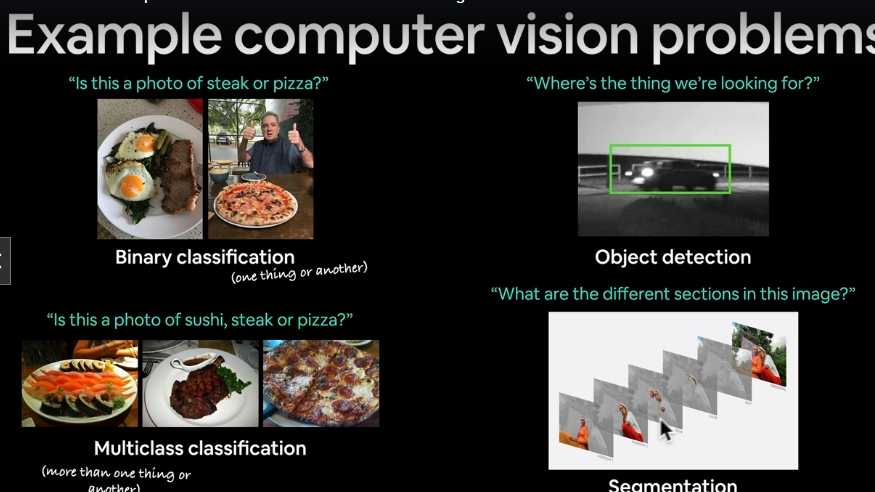

## Covering in this Notebook

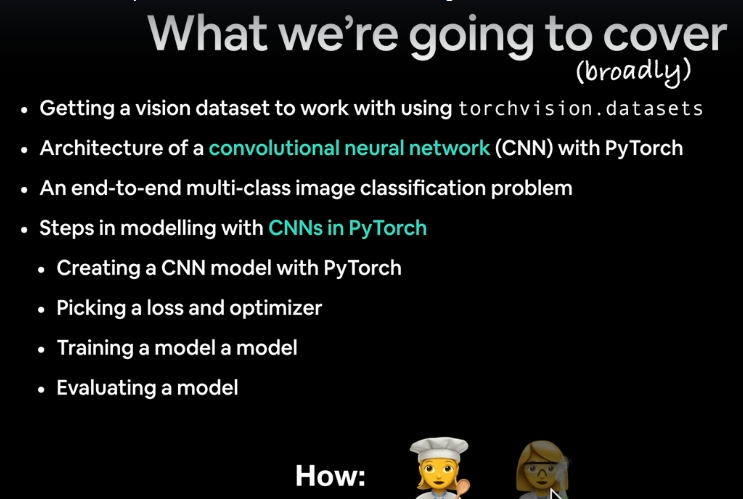

## Input and output shapes

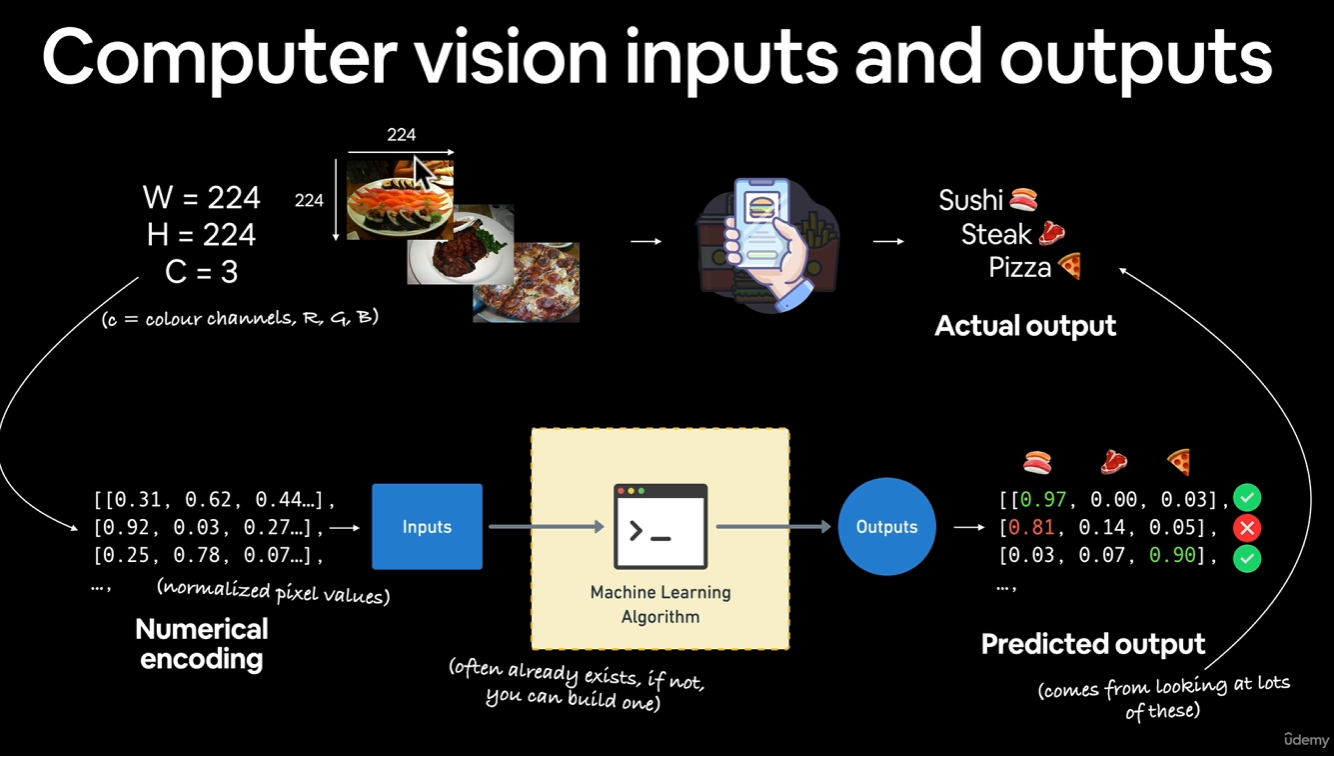

Convolutional neural networks (CNN) is best with image 

Transformer also works


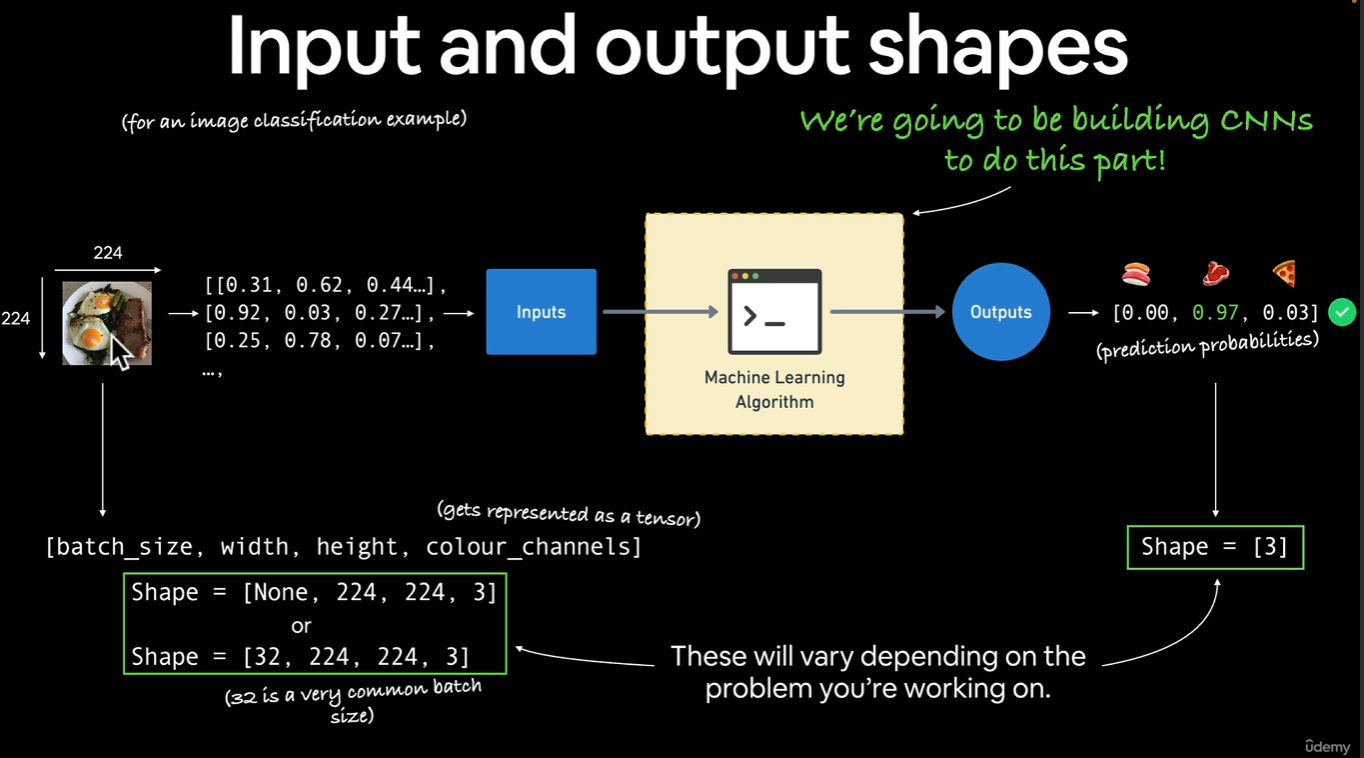

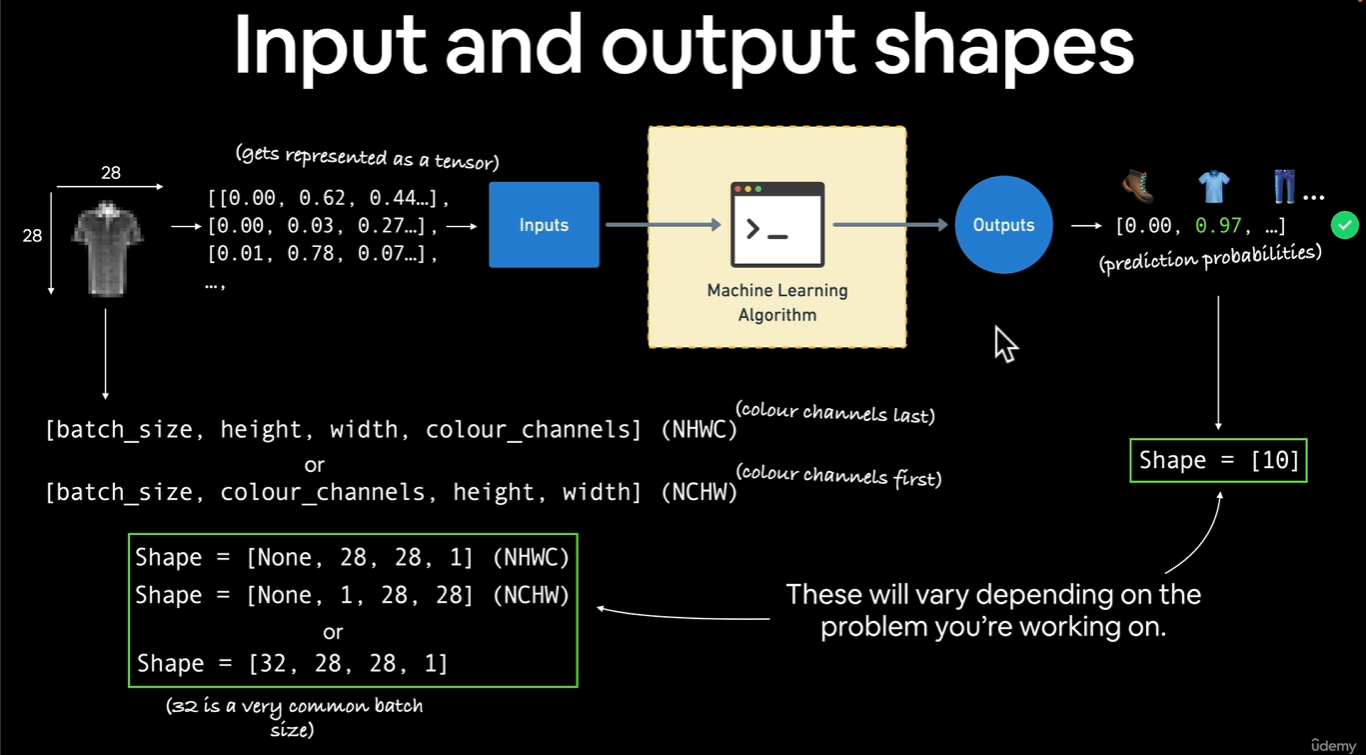

## Workflow

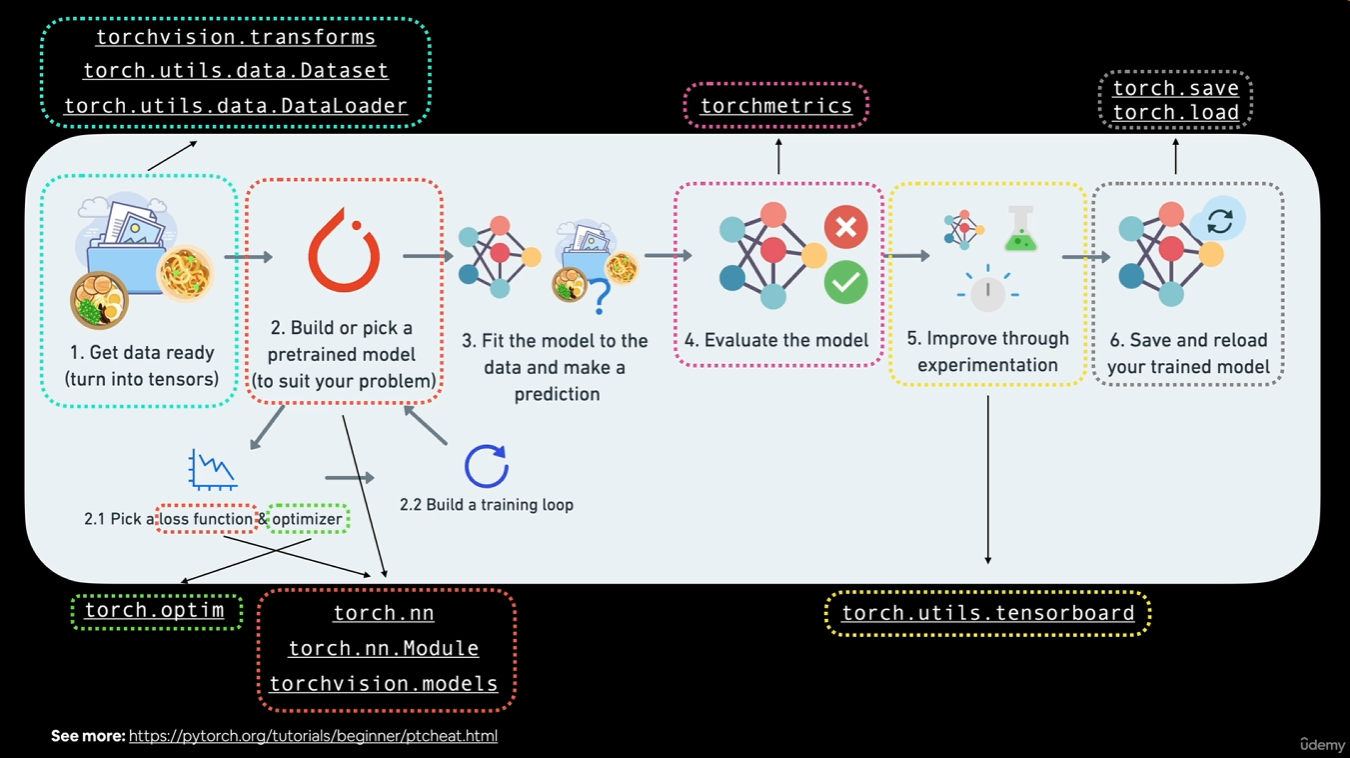

## Architecture of a CNN

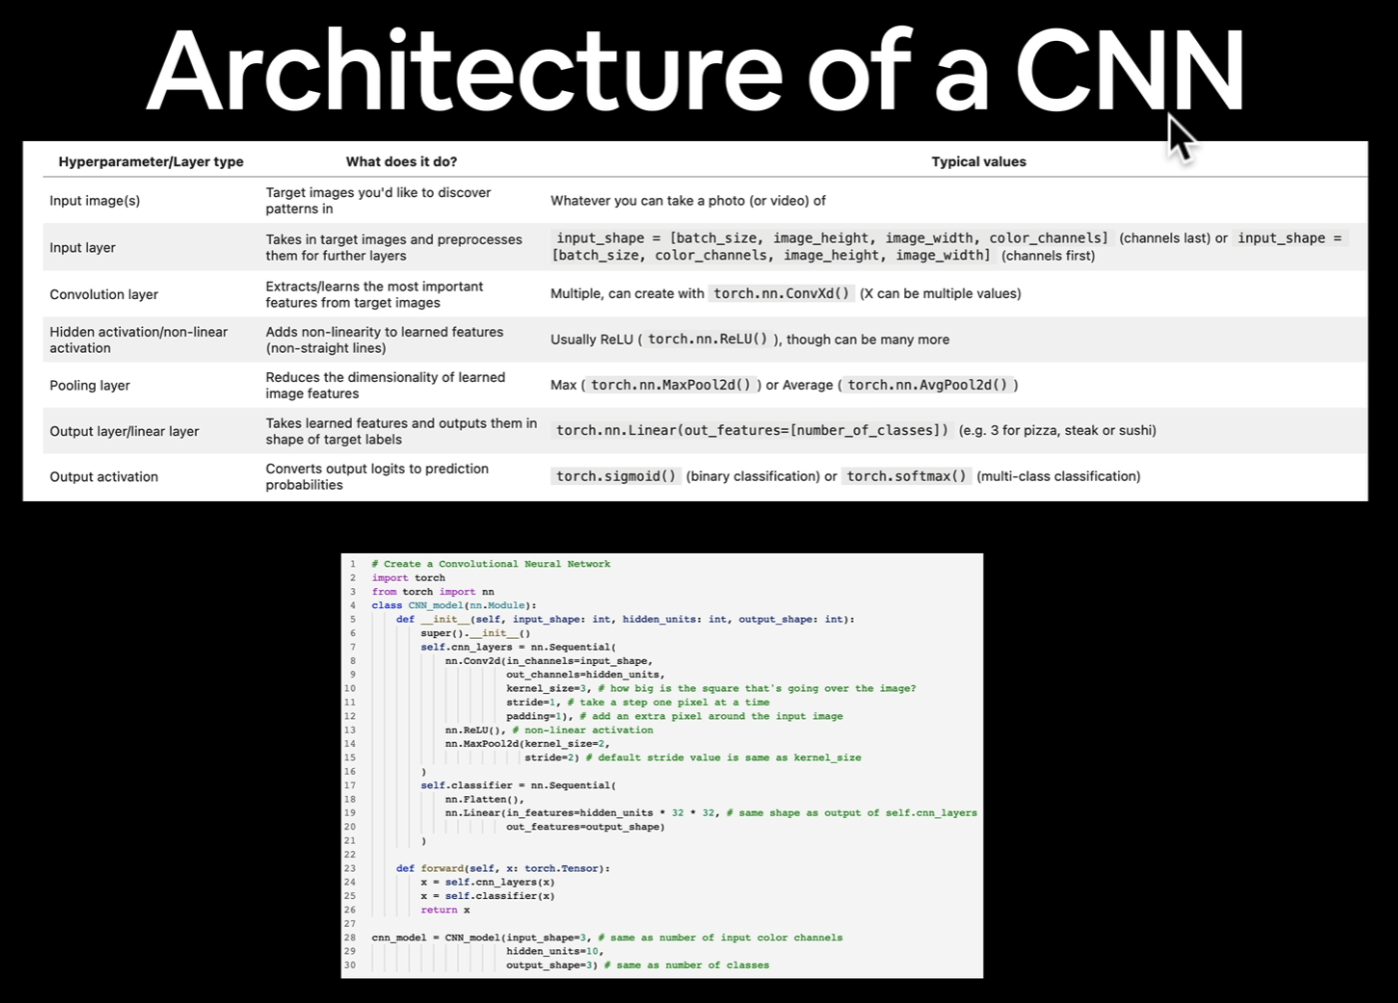

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

## 0. Computer Vision Libaries in PyTorch

* `torchvision` - base domain library for pytorch
    * <https://pytorch.org/vision/stable/index.html>
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for an ML model
* `torch.utils.data.Dataset` - Base dataset clkass for PyTorch
* `torch.ultils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.4.0
0.19.0


## 1. Getting a Dataset

The dataset we'll be using is **FasionMNIST** from `torchvision.datasets`
* <https://github.com/zalandoresearch/fashion-mnist>
* <https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html>

Target = what you are trying to predict (Labels)

In [2]:
## SET UP TRAINING AND TEST DATA ##

# Set up training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to downbload the data
    train=True, # Do we want the training set? if False, we get the test set
    download=True, # Do we want to download the data? If False, we assume it is already downloaded
    transform=ToTensor(), # How we want to transform the data. In this case, we want to convert it to a tensor
    #transform=torchvision.transforms.ToTensor(), # Same as above
    target_transform=None # How do we want to transforms the labels/targets
)

# Set up test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [3]:
# Check out atrributes of the data
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shappe : {image.shape} -> [color_channels, height, width]")
print(f"Label : {label} -> {class_names[label]}")
# Label doesn't have a shape because it is a scalar (integer)
# It only has 1 color channel because it is a grayscale image

Image shappe : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label : 9 -> Ankle boot


### 1.2 Visualizing our Data

Image shape: torch.Size([1, 28, 28])


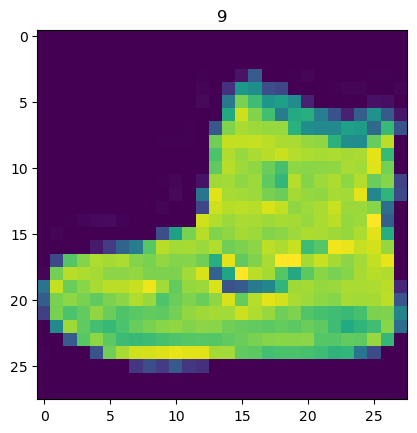

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()); # Squeeze removes the color channel (because it is only 1)
plt.title(label);

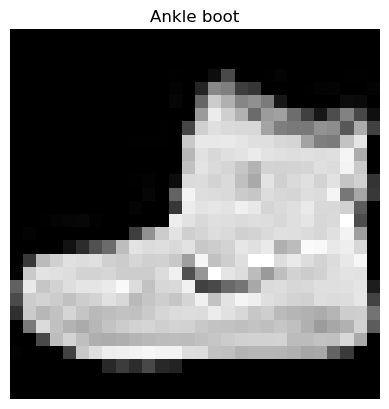

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis('off');

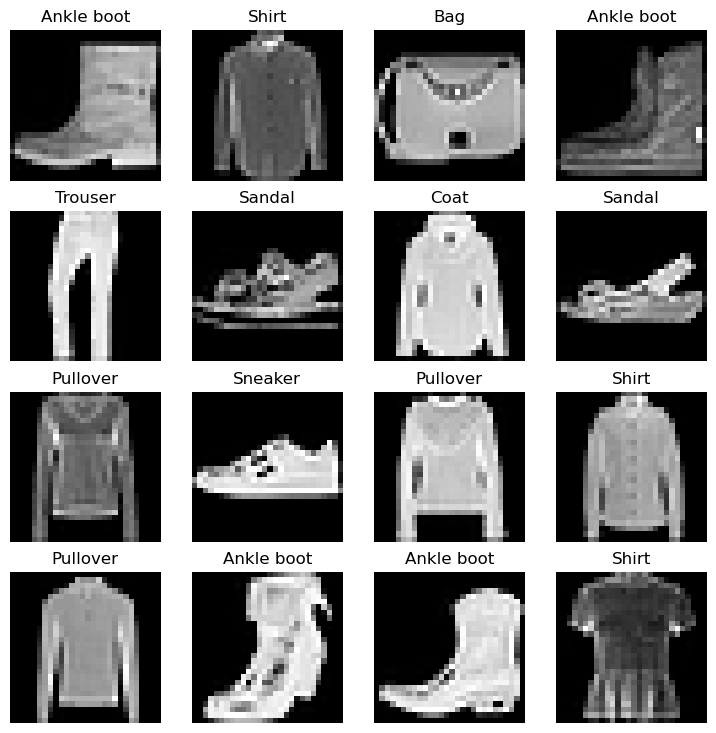

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearaires

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets. We want them to into DataLoader

**DataLoader** turns our dataset into a Python iterable.

<https://pytorch.org/docs/stable/data.html>

More specifically, we want to tturn our data into batches (or mini-batches)

Why would we do this?

1. it is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (Batch size of 32) (32 is abritary,  a common batch size with many beginner style problems)
2. It gives our nerual network more chances to update its gradient per epoch

for more on minibatches, see here: <https://youtu.be/4qJaSmvhxi8>

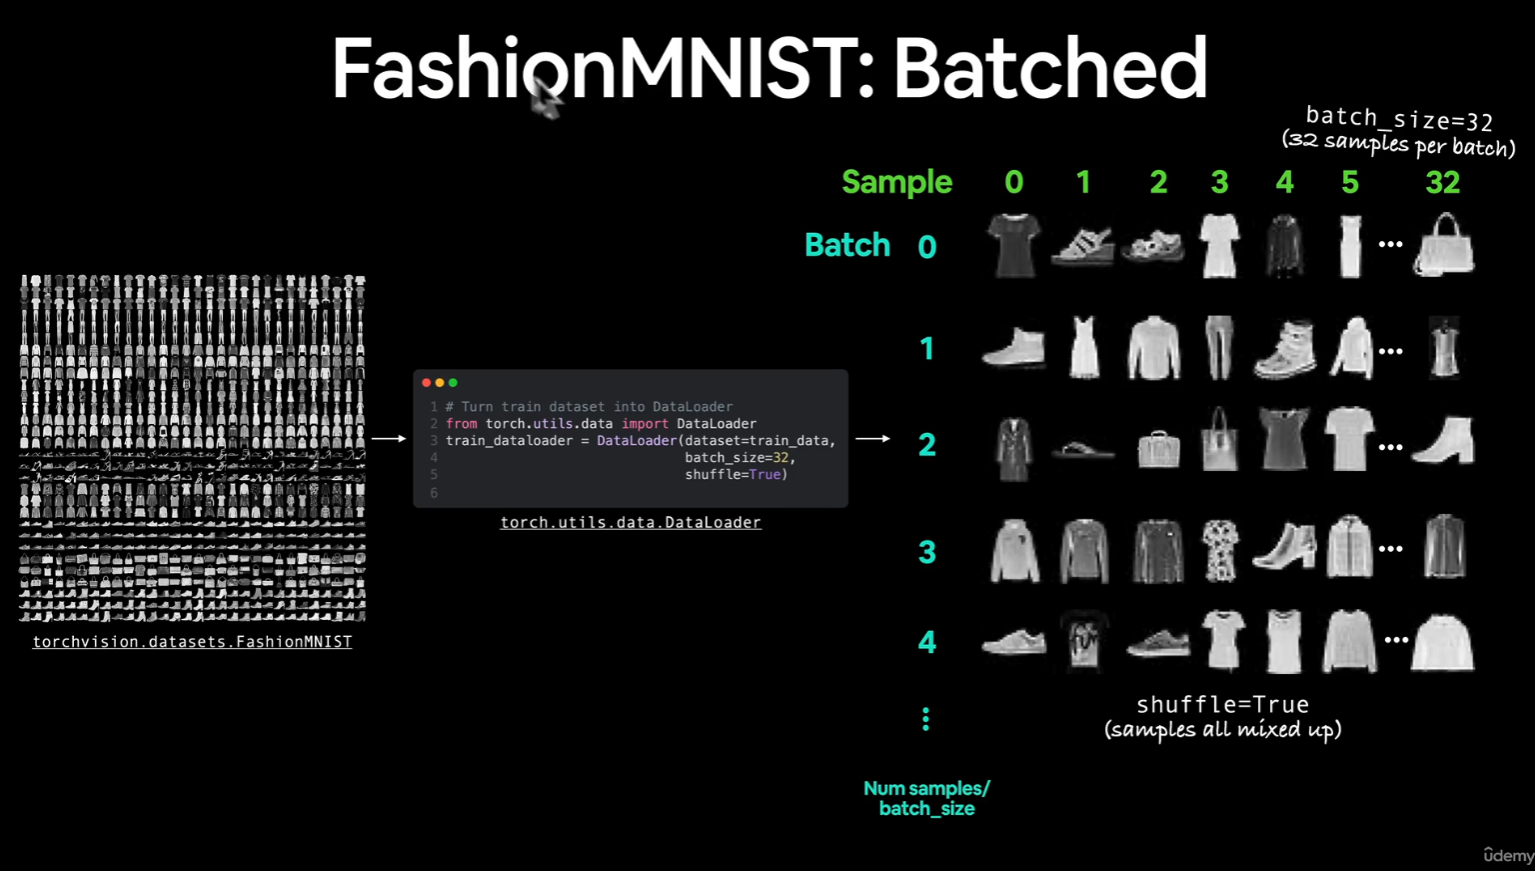

In [13]:
from torch.utils.data import DataLoader

# Set up batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into interables (batches)
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True) # good practice to shuffle the data, so the model doesn't learn the order of the data

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False) # No need to shuffle the test data, because we are not training on it

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d80e5193a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d80e283170>)

In [15]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader}, {test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x000001D80E5193A0>, <torch.utils.data.dataloader.DataLoader object at 0x000001D80E283170>
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8 , label size: torch.Size([])


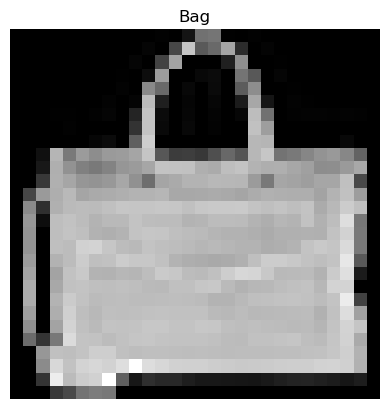

In [17]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label.item()])
plt.axis('off');
print(f"Image size: {img.shape}")
print(f"Label: {label} , label size: {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of macchine learning modeling experiments, it's best practice to start with a baseline model.

**A baseline model** is a simple model you will try and improve upon with subsequent models/experiements

In other words: start simply and add complexity when necessary.

flatten combines it into a vector

In [18]:
# Create a flatten Layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the image
output = flatten_model(x) # perform forward pass

# print our what happened
print(f"Original shape: {x.shape} -> [color_channels, height, width]")
print(f"Flattened shape: {output.shape} -> [color_channels, height * width]")


Original shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Flattened shape: torch.Size([1, 784]) -> [color_channels, height * width]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, 
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,# how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntrophyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (strochastic gradient descent), the entry lever optimizer
* Evaluation metric - since we're working with on a classification problem, let's use accruacy as our evaluation metric

In [23]:
# Download helper functions
import requests
from pathlib import Path

# Downlaod helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/learnpytorch/colab-notebooks/main/helper_functions.py")

helper_functions.py, skipping download


In [24]:
# Import accuracy metric 
from helper_functions import accuracy_fn
# NOTE: you can also use torch.metrics, this is just for practice so we know how to import helper functions

# Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performace (loss and accuracy values, etc)
2. how fast it runs

https://docs.python.org/3/library/timeit.html

In [25]:
from timeit import default_timer as timer
def print_train_time(start: float, 
                     end: float,
                     device: torch.device = None):
    
    """ Prints difference between start and end time."""
    total_time = end - start    
    print(f"train time on {device}: {total_time:.3f} seconds")
    return total_time

In [26]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

train time on cpu: 0.000 seconds


1.9300000531075057e-05

### 3.3 Creatomg a training loop and training a model on batches of data 

A little different than before:
1. Loop thrrough epochs
2. loop through training batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perfrom testing steps, calculate the test loss *per batch*
4. print out what's happening.
5. time it all (for fun)

https://github.com/tqdm/tqdm
* recognizes what computer environment we are using and gives us the best progress bar

In [27]:
# import tqdm for progress bars
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3
# it's good to train small to start with, to make sure the model is working

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    
    ### Training loop
    train_loss = 0
    model_0.train()
    for batch, (X, y) in enumerate(train_dataloader): # (images, labels) = (X, y) = (inputs, targets) = (features, labels)
        model_0.train( ) # this is default, but it's good practice to set it
        # 1. Forward pass
        y_pred = model_0(X)
        # 2. Compute loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # New, accumulate train loss
        # 3. optimzer zero grad
        optimizer.zero_grad()
        # 4. Backward pass
        loss.backward()
        # 5. Update model (optimize step)
        optimizer.step() # this is in this loop, because we want to update the model after every batch.
        # print out what's happening
        if batch % 400 == 0:
            print(f"looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples")

    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### test loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)
            # 2. Compute loss
            test_loss += loss_fn(test_pred, y_test)
            # 3. Compute accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # since we were using logits, we need to compare labels to labels here

        # Calculate the test loss average per batch
        test_loss /= len(test_data)
        # Calculate the test accuracy per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening
    print(f"\nEpoch {epoch+1}, Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                            end=train_time_end_on_cpu, 
                                            device=str(next(model_0.parameters()))) # checking where our model_0 parameters are at

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1
-------------------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Epoch 1, Train Loss: 0.5904 | Test Loss: 0.0159 | Test Accuracy: 82.0387
Epoch 2
-------------------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Epoch 2, Train Loss: 0.4763 | Test Loss: 0.0150 | Test Accuracy: 83.1969
Epoch 3
-------------------------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Epoch 3, Train Loss: 0.4550 | Test Loss: 0.0149 | Test Accuracy: 83.4265
train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0

In [28]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get model 0 results


In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accurancy_fn):
    """Return a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return{"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss" : loss.item(),
           "model_acc" : acc
           }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accurancy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a gpu (or mps) if there is one)

In [30]:
!nvidia-smi

Thu Oct 24 06:59:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
| 32%   31C    P5             21W /  153W |     752MiB /  12288MiB |     29%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [31]:
torch.cuda.is_available()

True

In [32]:
# Step up device-agnostic code
import torch

def get_device():
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

device = get_device()
print(f"Using device: {device}")

Using device: cuda


## 6. Model 1: Building a better model with non-linearity

We learn about the power of non-linearity in notebook 2: "notebooks\02_pytorch_classification.ipynb"

We will use relu


In [33]:
#create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape, 
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [34]:
# Create an instance of the model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten layer after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimzer and evaluation matrics

(we did this one model_0 so explaination can be found there)

In [35]:
from helper_functions import accuracy_fn
loss = nn.CrossEntropyLoss() # Measure how wrong the model is
optimizer = torch.optim.SGD(model_1.parameters(), # tries to update models parameters to reduce loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Best practice and reduce errors

Let's create a function for:
* training loop - `train_step()` for each epoch in arrange, call this
    * We need Model, dataloader, loss function, optimizer
    * Optional: accuracy function and target device
* testing loop - `test_step()` for each epoch in arrange, call this

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on data_loader"""
    
    train_loss, train_acc = 0, 0

    # Set model to training mode
    model.train()
    
    for batch, (X, y) in enumerate(data_loader): 

        # 0. Put data on target device
        X, y = X.to(device), y.to(device)
        
        #model.train() # Keep this model agnostic, so we can use any model

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Compute loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() #accumulate train loss
        train_acc += accuracy_fn(y_true=y, 
                                 y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels
        
        # 3. Optimzer zero grad
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Update model (optimize step)
        optimizer.step() # this is in this loop, because we want to update the model after every batch.

    # divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}")


In [37]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""
    
    test_loss, test_acc = 0, 0

    # Set model to evaluation mode
    model.eval()

    # turn on inference model context manager
    with torch.inference_mode():
        for X, y in data_loader:

            # 0. Put data on target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Compute loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, 
                                   y_pred=test_pred.argmax(dim=1))
            
        # adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

In [38]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
if device == "cuda":
    train_time_start_on_gpu = timer()
elif device == "mps":
    train_time_start_on_mps = timer()
else:
    train_time_start_on_cpu = timer()

# set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    
    # Train model
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    # Test model
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss,
              accuracy_fn=accuracy_fn,
              device=device)

# train_time_end_on_gpu= timer()
# train_time_end_on_mps= timer()
# train_time_end_on_cpu= timer()


if device == "cuda":
    train_time_end_on_gpu= timer()
    total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, 
                                                end=train_time_end_on_gpu, 
                                                device=device)
elif device == "mps":
    train_time_end_on_mps= timer()
    total_train_time_model_1 = print_train_time(start=train_time_start_on_mps, 
                                                end=train_time_end_on_mps, 
                                                device=device)
else:
    train_time_end_on_cpu= timer()
    total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, 
                                            end=train_time_end_on_cpu, 
                                            device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Train Loss: 1.09199 | Train Accuracy: 61.34
Test Loss: 0.95636 | Test Accuracy: 65.00%

Epoch 2
-------------------------------
Train Loss: 0.78101 | Train Accuracy: 71.93
Test Loss: 0.72227 | Test Accuracy: 73.91%

Epoch 3
-------------------------------
Train Loss: 0.67027 | Train Accuracy: 75.94
Test Loss: 0.68500 | Test Accuracy: 75.02%

train time on cuda: 22.554 seconds


#### GPU vs CPU
**Note:** sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU:

Why is this?
1. It could be that the overhead for copying data/model to and from the GPU outwieghs the compute benefit offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than GPU

<https://horace.io/brrr_intro.html>

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [40]:
# Train time on CPU
total_train_time_model_0

25.643428099999255

In [41]:
# make eval_model() device agnostic
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accurancy_fn,
               device=device):
    """Return a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make our data device agnostic
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return{"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss" : loss.item(),
           "model_acc" : acc
           }

In [42]:
# Get Model_1 results Dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accurancy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [44]:
total_train_time_model_1

22.554304399999637

In [45]:
total_train_time_model_0

25.643428099999255

## Model 2: Build a Convolutional Neural Network

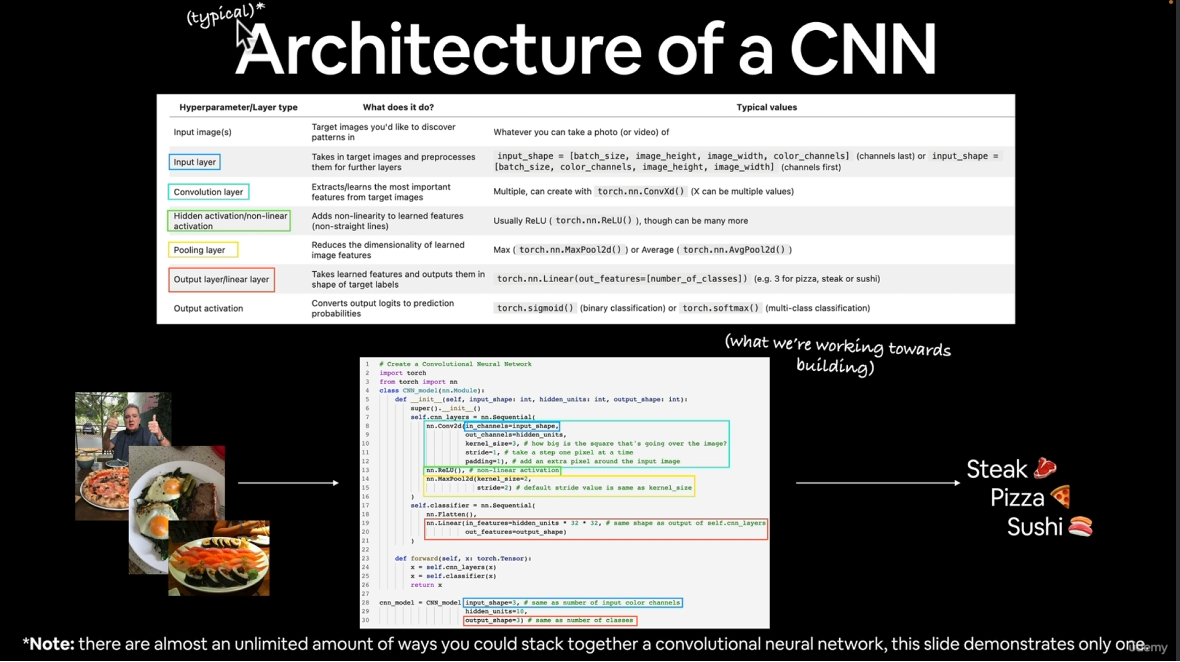